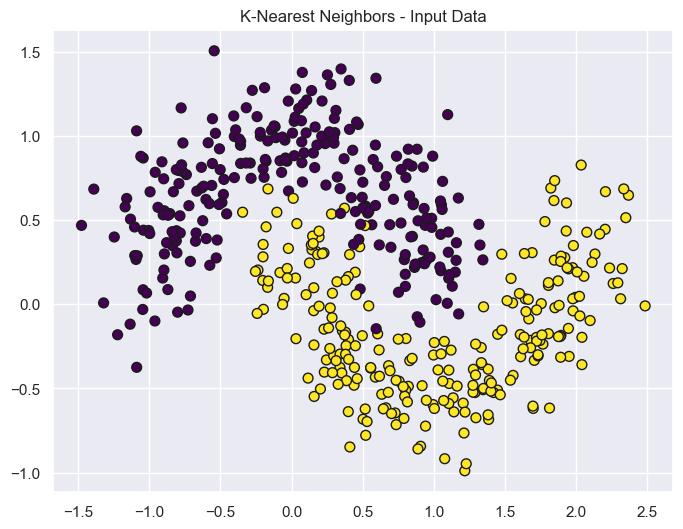

Best K Value: 16


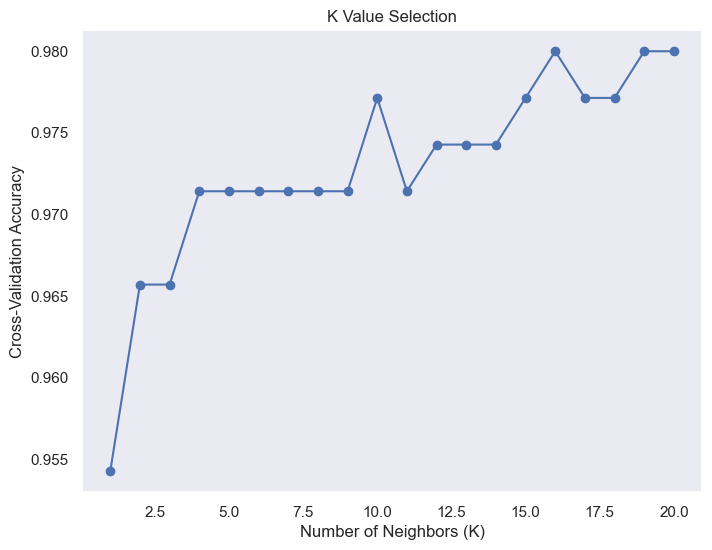

Test Accuracy: 0.98


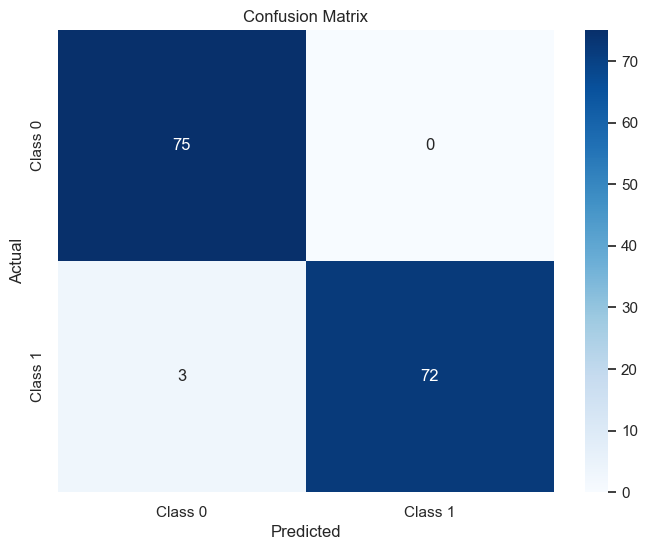

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        75
           1       1.00      0.96      0.98        75

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



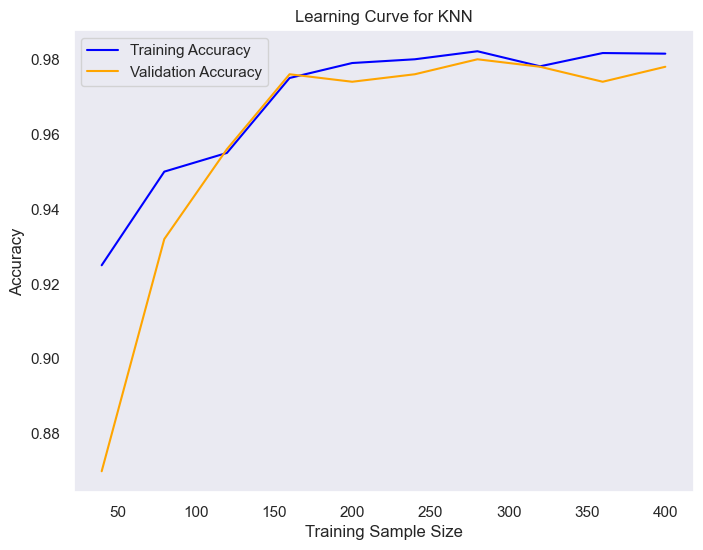

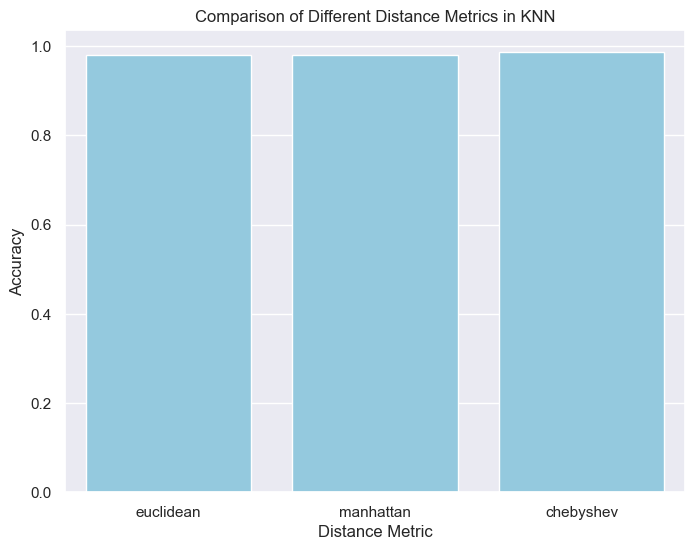

Accuracy for different distance metrics:
Euclidean: 0.98
Manhattan: 0.98
Chebyshev: 0.99


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import os


sns.set_theme()


output_dir = "Supervised_Learning/KNN"
os.makedirs(output_dir, exist_ok=True)


X, y = make_moons(n_samples=500, noise=0.2, random_state=42)


plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("K-Nearest Neighbors - Input Data")
plt.savefig(os.path.join(output_dir, "knn_input_data.png"))
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


k_values = range(1, 21)
cv_scores = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())


best_k = k_values[np.argmax(cv_scores)]
print(f"Best K Value: {best_k}")


plt.figure(figsize=(8, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("K Value Selection")
plt.grid()
plt.savefig(os.path.join(output_dir, "knn_k_value_selection.png"))
plt.show()


knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig(os.path.join(output_dir, "knn_confusion_matrix.png"))
plt.show()


print("Classification Report:\n", classification_report(y_test, y_pred))


train_sizes, train_scores, test_scores = learning_curve(
    knn, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
plt.plot(train_sizes, test_mean, label="Validation Accuracy", color="orange")
plt.title("Learning Curve for KNN")
plt.xlabel("Training Sample Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.savefig(os.path.join(output_dir, "knn_learning_curve.png"))
plt.show()


distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
accuracy_results = {}

for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_results[metric] = accuracy_score(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), color="skyblue")
plt.title("Comparison of Different Distance Metrics in KNN")
plt.xlabel("Distance Metric")
plt.ylabel("Accuracy")
plt.savefig(os.path.join(output_dir, "knn_distance_comparison.png"))
plt.show()


print("Accuracy for different distance metrics:")
for metric, acc in accuracy_results.items():
    print(f"{metric.capitalize()}: {acc:.2f}")
